In [2]:
#Exploring Dataset 


In [1]:
#import library

import numpy as np #mengoperasikan array,vektor,matrix,perhitungan math
import pandas as pd #memproses data

import matplotlib.pyplot as plt #visualisasi data
import seaborn as sns; sns.set() #menampilkan visualisasi grafik

import re #mencari karakter tertentu pada text
import nltk #untuk melakukan text preprocessing
from nltk.corpus import stopwords #menghasilkan daftar kata yang sering muncul

from sklearn.feature_extraction.text import TfidfVectorizer #melakukan pembobotan TF-IDF
from sklearn.model_selection import KFold #membagi data train, data test
from sklearn.model_selection import GridSearchCV #mencari parameter terbaik
from sklearn.svm import SVC #pelatihan model dengan SVM
from wordcloud import WordCloud

from jcopml.utils import save_model, load_model
from jcopml.plot import plot_classification_report, plot_confusion_matrix #evaluasi model


In [2]:
#read dataset

In [3]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
cols = ['date','user','tweet','sentimen']
df = pd.read_csv("test_file_fix.csv",header=None, names=cols)
# above line will be different depending on where you saved your data, and your file name
df.head()





,date,user,tweet,sentimen
0,10/14/2020 14:56,bukalapak,"kak, maaf atas kendalanya ya kak. Bella bantu ...",negatif
1,10/14/2020 14:56,HaqyPutri,"follow @bukalapak yuk, karena byk Hadiah menan...",positif
2,10/14/2020 14:56,bukalapak,"Baik kak, maaf atas kendalanya ya kak. Bella b...",negatif
3,10/14/2020 15:07,awereweaceh,Saya mengajakmu bergabung ke Bukalapak dan mem...,positif
4,10/14/2020 15:07,Naufaldaakbar,"tolong nomor dana saya hangus, ingin memutus ...",negatif


In [4]:
df.shape

(870, 4)

Data terdiri dari 887 baris dan 4 kolom

In [5]:
df.isna().sum()

date        0
user        0
tweet       0
sentimen    0
dtype: int64

tidak ada data kosong

In [6]:
df['sentimen'].value_counts()

positif    411
negatif    387
netral      72
Name: sentimen, dtype: int64

# Preprocessing

data cleaning

In [7]:
def multipleReplace(tweet):
    tweet = re.sub("(https:)\S+", "", tweet) #menghapus URL
    tweet = re.sub(r"(@)\S+", "", tweet) #menghapus akun
    tweet = re.sub(r"(#)\S+", "", tweet) #menghapus hashtag
    tweet = re.sub(r'\r\n', '', tweet) #menghapus enter
    tweet = re.sub(r'^a-zA-z0-9\s\?','', tweet) #menghapus karakter
    tweet = re.sub(r'\d+','', tweet) #menghapus angka
    return tweet

df['tweet'] = df['tweet'].apply(multipleReplace)
df.head()

,date,user,tweet,sentimen
0,10/14/2020 14:56,bukalapak,"kak, maaf atas kendalanya ya kak. Bella bantu ...",negatif
1,10/14/2020 14:56,HaqyPutri,"follow yuk, karena byk Hadiah menanti kalian ...",positif
2,10/14/2020 14:56,bukalapak,"Baik kak, maaf atas kendalanya ya kak. Bella b...",negatif
3,10/14/2020 15:07,awereweaceh,Saya mengajakmu bergabung ke Bukalapak dan mem...,positif
4,10/14/2020 15:07,Naufaldaakbar,"tolong nomor dana saya hangus, ingin memutus ...",negatif


case folding

In [8]:
def casefolding(x):
    x = " ".join(x.lower() for x in x.split())
    return x
df['tweet'] = df['tweet'].apply(casefolding)
df.head()

,date,user,tweet,sentimen
0,10/14/2020 14:56,bukalapak,"kak, maaf atas kendalanya ya kak. bella bantu ...",negatif
1,10/14/2020 14:56,HaqyPutri,"follow yuk, karena byk hadiah menanti kalian guys",positif
2,10/14/2020 14:56,bukalapak,"baik kak, maaf atas kendalanya ya kak. bella b...",negatif
3,10/14/2020 15:07,awereweaceh,saya mengajakmu bergabung ke bukalapak dan mem...,positif
4,10/14/2020 15:07,Naufaldaakbar,"tolong nomor dana saya hangus, ingin memutus a...",negatif


tokenizing

In [9]:
def tokenizing(y):
    y = re.split("\W+", y)
    return y
df['tokenizing'] = df['tweet'].apply(tokenizing)
df.head()

,date,user,tweet,sentimen,tokenizing
0,10/14/2020 14:56,bukalapak,"kak, maaf atas kendalanya ya kak. bella bantu ...",negatif,"[kak, maaf, atas, kendalanya, ya, kak, bella, ..."
1,10/14/2020 14:56,HaqyPutri,"follow yuk, karena byk hadiah menanti kalian guys",positif,"[follow, yuk, karena, byk, hadiah, menanti, ka..."
2,10/14/2020 14:56,bukalapak,"baik kak, maaf atas kendalanya ya kak. bella b...",negatif,"[baik, kak, maaf, atas, kendalanya, ya, kak, b..."
3,10/14/2020 15:07,awereweaceh,saya mengajakmu bergabung ke bukalapak dan mem...,positif,"[saya, mengajakmu, bergabung, ke, bukalapak, d..."
4,10/14/2020 15:07,Naufaldaakbar,"tolong nomor dana saya hangus, ingin memutus a...",negatif,"[tolong, nomor, dana, saya, hangus, ingin, mem..."


stopword removal 

In [10]:
stopword = nltk.corpus.stopwords.words('indonesian')
def remove_stopwords(z):
    z = [word for word in z if word not in stopword]
    return z
df['stop_removal'] = df['tokenizing'].apply(remove_stopwords)
df.head()

,date,user,tweet,sentimen,tokenizing,stop_removal
0,10/14/2020 14:56,bukalapak,"kak, maaf atas kendalanya ya kak. bella bantu ...",negatif,"[kak, maaf, atas, kendalanya, ya, kak, bella, ...","[kak, maaf, kendalanya, ya, kak, bella, bantu,..."
1,10/14/2020 14:56,HaqyPutri,"follow yuk, karena byk hadiah menanti kalian guys",positif,"[follow, yuk, karena, byk, hadiah, menanti, ka...","[follow, yuk, byk, hadiah, guys]"
2,10/14/2020 14:56,bukalapak,"baik kak, maaf atas kendalanya ya kak. bella b...",negatif,"[baik, kak, maaf, atas, kendalanya, ya, kak, b...","[kak, maaf, kendalanya, ya, kak, bella, bantu,..."
3,10/14/2020 15:07,awereweaceh,saya mengajakmu bergabung ke bukalapak dan mem...,positif,"[saya, mengajakmu, bergabung, ke, bukalapak, d...","[mengajakmu, bergabung, bukalapak, memberikanm..."
4,10/14/2020 15:07,Naufaldaakbar,"tolong nomor dana saya hangus, ingin memutus a...",negatif,"[tolong, nomor, dana, saya, hangus, ingin, mem...","[tolong, nomor, dana, hangus, memutus, akun, d..."


hasil preprocessing

In [11]:
tweet_preprocessing = df[['stop_removal']]
def fit_stopwords(text):
    text = np.array(text)
    text = " ".join(text)
    return text
df['stop_removal'] = df['stop_removal'].apply(fit_stopwords)
df.rename(columns={'stop_removal':'tweet_preprocessing'}, inplace=True)
df.head()

,date,user,tweet,sentimen,tokenizing,tweet_preprocessing
0,10/14/2020 14:56,bukalapak,"kak, maaf atas kendalanya ya kak. bella bantu ...",negatif,"[kak, maaf, atas, kendalanya, ya, kak, bella, ...",kak maaf kendalanya ya kak bella bantu kendala...
1,10/14/2020 14:56,HaqyPutri,"follow yuk, karena byk hadiah menanti kalian guys",positif,"[follow, yuk, karena, byk, hadiah, menanti, ka...",follow yuk byk hadiah guys
2,10/14/2020 14:56,bukalapak,"baik kak, maaf atas kendalanya ya kak. bella b...",negatif,"[baik, kak, maaf, atas, kendalanya, ya, kak, b...",kak maaf kendalanya ya kak bella bantu kendala...
3,10/14/2020 15:07,awereweaceh,saya mengajakmu bergabung ke bukalapak dan mem...,positif,"[saya, mengajakmu, bergabung, ke, bukalapak, d...",mengajakmu bergabung bukalapak memberikanmu cr...
4,10/14/2020 15:07,Naufaldaakbar,"tolong nomor dana saya hangus, ingin memutus a...",negatif,"[tolong, nomor, dana, saya, hangus, ingin, mem...",tolong nomor dana hangus memutus akun dana


In [12]:
df_pilih = df[["tweet_preprocessing","sentimen"]]
df_pilih.head()

,tweet_preprocessing,sentimen
0,kak maaf kendalanya ya kak bella bantu kendala...,negatif
1,follow yuk byk hadiah guys,positif
2,kak maaf kendalanya ya kak bella bantu kendala...,negatif
3,mengajakmu bergabung bukalapak memberikanmu cr...,positif
4,tolong nomor dana hangus memutus akun dana,negatif


In [13]:
df_pilih.to_csv('preprocessing_skripsi.csv')

# Pembobotan tf-idf

In [14]:
df_pilih.sentimen.replace("positif", 1, inplace = True)
df_pilih.sentimen.replace("netral", 0, inplace = True)
df_pilih.sentimen.replace("negatif", -1, inplace = True)
df_pilih.sentimen= df_pilih.sentimen.apply(lambda x : int(x))
df_pilih.head()

/home/diana/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/home/diana/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,tweet_preprocessing,sentimen
0,kak maaf kendalanya ya kak bella bantu kendala...,-1
1,follow yuk byk hadiah guys,1
2,kak maaf kendalanya ya kak bella bantu kendala...,-1
3,mengajakmu bergabung bukalapak memberikanmu cr...,1
4,tolong nomor dana hangus memutus akun dana,-1


In [15]:
df_pilih = df_pilih[["tweet_preprocessing","sentimen"]]
df_pilih.head()


,tweet_preprocessing,sentimen
0,kak maaf kendalanya ya kak bella bantu kendala...,-1
1,follow yuk byk hadiah guys,1
2,kak maaf kendalanya ya kak bella bantu kendala...,-1
3,mengajakmu bergabung bukalapak memberikanmu cr...,1
4,tolong nomor dana hangus memutus akun dana,-1


In [16]:
text = df_pilih['tweet_preprocessing']
df_tfidf = pd.DataFrame(text)
df_tfidf


,tweet_preprocessing
0,kak maaf kendalanya ya kak bella bantu kendala...
1,follow yuk byk hadiah guys
2,kak maaf kendalanya ya kak bella bantu kendala...
3,mengajakmu bergabung bukalapak memberikanmu cr...
4,tolong nomor dana hangus memutus akun dana
...,...
865,kak mohon maaf kakak transaksi hubungâ
866,yg sms bukalapak
867,terimakasih infonyaðÿ ðÿ
868,ketipu untung keburu curiga ikutin petunjuk pe...


In [17]:
tfidf_vectorizer=TfidfVectorizer(smooth_idf=False) 
  
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(df_tfidf['tweet_preprocessing'])
tfidf_vectorizer_vectors.shape

(870, 1411)

In [18]:
df_tfidf[tfidf_vectorizer.get_feature_names()] = tfidf_vectorizer_vectors.todense()
df_tfidf

,tweet_preprocessing,abis,academy,acak,acc,aceh,ade,admin,agave,ahh,...,your,yu,yuk,yukk,yuâ,zakat,zilingoooo,zncbainf,âœ,ðÿ
0,kak maaf kendalanya ya kak bella bantu kendala...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,follow yuk byk hadiah guys,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.256107,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,kak maaf kendalanya ya kak bella bantu kendala...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,mengajakmu bergabung bukalapak memberikanmu cr...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,tolong nomor dana hangus memutus akun dana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,kak mohon maaf kakak transaksi hubungâ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
866,yg sms bukalapak,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
867,terimakasih infonyaðÿ ðÿ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.463672
868,ketipu untung keburu curiga ikutin petunjuk pe...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [19]:
df_tfidf[:1000]

,tweet_preprocessing,abis,academy,acak,acc,aceh,ade,admin,agave,ahh,...,your,yu,yuk,yukk,yuâ,zakat,zilingoooo,zncbainf,âœ,ðÿ
0,kak maaf kendalanya ya kak bella bantu kendala...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,follow yuk byk hadiah guys,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.256107,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,kak maaf kendalanya ya kak bella bantu kendala...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,mengajakmu bergabung bukalapak memberikanmu cr...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,tolong nomor dana hangus memutus akun dana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,kak mohon maaf kakak transaksi hubungâ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
866,yg sms bukalapak,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
867,terimakasih infonyaðÿ ðÿ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.463672
868,ketipu untung keburu curiga ikutin petunjuk pe...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [20]:
df_tfidf.to_csv('tfidf_skripsi.csv')

# Data splitting

In [21]:
kf=KFold(n_splits=10, random_state=0, shuffle=True)
print(kf)  
i=1        
for train, test in kf.split(tfidf_vectorizer_vectors):
    print("Fold ", i)
    print("TRAIN :", train, "TEST :", test)
    x_train=tfidf_vectorizer_vectors[train]
    x_test=tfidf_vectorizer_vectors[test]
    y_train=df_pilih['sentimen'][train]
    y_test=df_pilih['sentimen'][test]
    i+=1
print("shape x_train :", x_train.shape)
print("shape x_test :", x_test.shape)

KFold(n_splits=10, random_state=0, shuffle=True)
Fold  1
TRAIN : [  0   1   2   3   4   5   6   7   9  10  11  12  13  15  16  17  18  19
  20  21  22  23  24  25  26  28  29  30  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  56  57  58
  59  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  98  99 100 101 102 104 105 106 107 108 109 110 111 112 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 143 144 146 147 148 149 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 197 198 199 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 237 238 239 240 241 242 243 244 245 246 24

# Optimasi parameter

In [22]:
param_grid = {'C': [ 0.1, 1, 10, 100], 
              'gamma': [0.1, 1, 10, 100],
              'kernel': ['rbf']}

# Pelatihan model

In [23]:
model = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=10)
model.fit(x_train,y_train)

print(model.best_params_)
print(model.score(x_train, y_train), model.best_score_, model.score(x_test, y_test))

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   20.8s finished


{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.7637292464878672 0.6484745212593314 0.7126436781609196


In [24]:
df_grid = pd.DataFrame(model.cv_results_).sort_values('rank_test_score')
df_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
4,0.104938,0.003779,0.009608,0.000472,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.784810,0.670886,...,0.820513,0.782051,0.743590,0.525641,0.461538,0.538462,0.423077,0.648475,0.139951,1
5,0.107181,0.002131,0.008935,0.000818,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.645570,0.594937,...,0.756410,0.794872,0.653846,0.487179,0.461538,0.512821,0.423077,0.600114,0.119694,2
8,0.121476,0.012652,0.009425,0.001378,10,0.1,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.569620,0.594937,...,0.679487,0.743590,0.641026,0.500000,0.487179,0.500000,0.410256,0.574635,0.096060,3
1,0.121563,0.013834,0.011311,0.002802,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.594937,0.607595,...,0.653846,0.679487,0.730769,0.358974,0.358974,0.538462,0.474359,0.564297,0.123082,4
9,0.122075,0.014840,0.009742,0.001481,10,1,rbf,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}",0.493671,0.556962,...,0.602564,0.730769,0.641026,0.512821,0.512821,0.487179,0.397436,0.551753,0.088287,5
13,0.117320,0.012448,0.008897,0.000809,100,1,rbf,"{'C': 100, 'gamma': 1, 'kernel': 'rbf'}",0.493671,0.556962,...,0.602564,0.730769,0.641026,0.512821,0.512821,0.487179,0.397436,0.551753,0.088287,5
12,0.118034,0.012378,0.008477,0.000995,100,0.1,rbf,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}",0.430380,0.594937,...,0.589744,0.730769,0.641026,0.512821,0.500000,0.474359,0.371795,0.542811,0.100378,7
7,0.120840,0.013646,0.009947,0.002177,1,100,rbf,"{'C': 1, 'gamma': 100, 'kernel': 'rbf'}",0.518987,0.569620,...,0.538462,0.730769,0.615385,0.294872,0.448718,0.487179,0.461538,0.520983,0.108243,8
11,0.123893,0.012800,0.009981,0.001636,10,100,rbf,"{'C': 10, 'gamma': 100, 'kernel': 'rbf'}",0.518987,0.569620,...,0.538462,0.730769,0.615385,0.294872,0.448718,0.487179,0.461538,0.519718,0.108037,9
15,0.116501,0.012054,0.008869,0.001085,100,100,rbf,"{'C': 100, 'gamma': 100, 'kernel': 'rbf'}",0.518987,0.569620,...,0.538462,0.730769,0.615385,0.294872,0.448718,0.487179,0.461538,0.519718,0.108037,9


# Evaluasi

In [25]:
model_pred = model.predict(x_test)
df_predict = pd.DataFrame()
df_predict['Hasil Prediksi sentimen'] = model_pred
df_predict

,Hasil Prediksi sentimen
0,1
1,1
2,1
3,1
4,-1
...,...
82,1
83,1
84,-1
85,-1


In [26]:
y_test

9      1
28     1
42     1
47     1
53    -1
      ..
813   -1
823    1
835    1
839   -1
853   -1
Name: sentimen, Length: 87, dtype: int64

In [27]:
df_predict['Hasil Prediksi sentimen'].value_counts()

 1    53
-1    34
Name: Hasil Prediksi sentimen, dtype: int64

In [28]:
plot_classification_report(x_train, y_train, x_test, y_test, model, report=True)

Train report
              precision    recall  f1-score   support

          -1       0.77      0.83      0.80       351
           0       0.00      0.00      0.00        67
           1       0.76      0.84      0.80       365

    accuracy                           0.76       783
   macro avg       0.51      0.56      0.53       783
weighted avg       0.70      0.76      0.73       783


Test report
              precision    recall  f1-score   support

          -1       0.71      0.67      0.69        36
           0       0.00      0.00      0.00         5
           1       0.72      0.83      0.77        46

    accuracy                           0.71        87
   macro avg       0.47      0.50      0.48        87
weighted avg       0.67      0.71      0.69        87



/home/diana/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


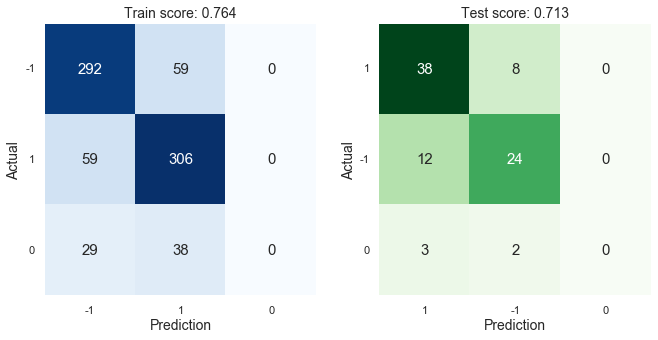

In [29]:
plot_confusion_matrix(x_train, y_train, x_test, y_test, model)

# Visualisasi

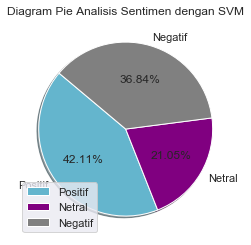

In [30]:
labels = ['Positif','Netral','Negatif']
Category1 = [40, 20, 35]
color = ['c', 'purple', 'grey']
plt.pie(Category1, labels=labels, colors=color, startangle=140, shadow=True, autopct='%1.2f%%')
plt.title('Diagram Pie Analisis Sentimen dengan SVM')
plt.legend()